In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\dsree\OneDrive\Desktop\Heart_disease_prediction\notebook\data\heart_disease_dataset.csv")

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,0,1,170,284,0,1,142,0,5.3,0,3,1,1
1,57,1,2,185,553,1,2,76,0,3.0,1,0,1,1
2,43,0,0,193,339,0,0,189,0,5.4,1,2,0,1
3,71,0,2,178,519,0,1,181,1,1.5,0,1,1,1
4,36,1,1,155,530,0,2,182,0,3.3,1,3,2,1


In [21]:
# ==========================
# 2. DATASET INFO
# ==========================

print("\nShape of Dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nDataset Info:")
print(df.info())



Shape of Dataset: (15000, 14)

Column Names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       15000 non-null  int64  
 1   sex       15000 non-null  int64  
 2   cp        15000 non-null  int64  
 3   trestbps  15000 non-null  int64  
 4   chol      15000 non-null  int64  
 5   fbs       15000 non-null  int64  
 6   restecg   15000 non-null  int64  
 7   thalach   15000 non-null  int64  
 8   exang     15000 non-null  int64  
 9   oldpeak   15000 non-null  float64
 10  slope     15000 non-null  int64  
 11  ca        15000 non-null  int64  
 12  thal      15000 non-null  int64  
 13  target    15000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.6 MB
None


In [22]:
# ==========================
# 3. STATISTICAL SUMMARY
# ==========================

df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000
mean,52.490600,0.506200,1.495333,146.541933,345.766667,0.502200,0.996400,136.170867,0.502400,3.086713,1.00780,1.486867,0.993200,0.959867
std,13.782952,0.499978,1.126497,30.582624,126.662392,0.500012,0.814718,38.113292,0.500011,1.801051,0.81432,1.118888,0.817312,0.196278
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,0.000000,120.000000,235.000000,0.000000,0.000000,103.000000,0.000000,1.500000,0.00000,0.000000,0.000000,1.000000
50%,52.000000,1.000000,2.000000,147.000000,348.000000,1.000000,1.000000,136.000000,1.000000,3.100000,1.00000,1.000000,1.000000,1.000000
75%,64.000000,1.000000,3.000000,173.000000,455.000000,1.000000,2.000000,170.000000,1.000000,4.600000,2.00000,2.000000,2.000000,1.000000
max,76.000000,1.000000,3.000000,199.000000,563.000000,1.000000,2.000000,201.000000,1.000000,6.200000,2.00000,3.000000,2.000000,1.000000



Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


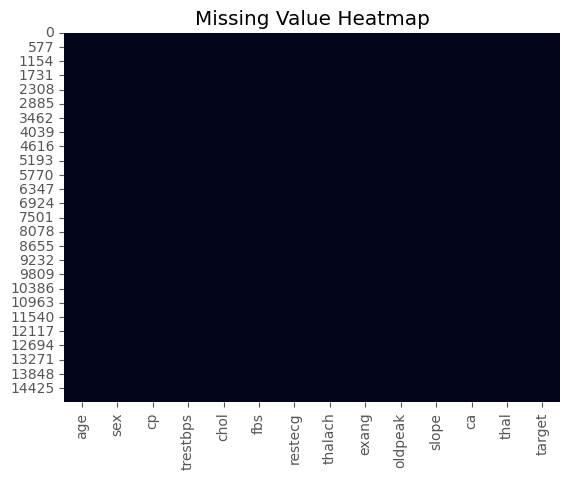

In [23]:
# ==========================
# 4. CHECK MISSING VALUES
# ==========================

print("\nMissing Values:")
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()



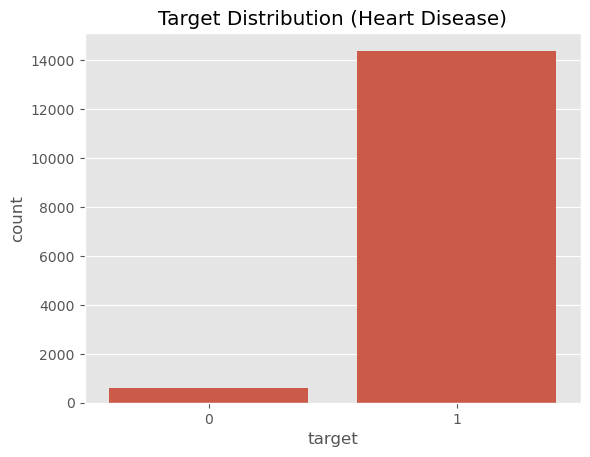

target
1    14398
0      602
Name: count, dtype: int64

In [24]:
# ==========================
# 5. TARGET BALANCE
# ==========================

sns.countplot(x='target', data=df)
plt.title("Target Distribution (Heart Disease)")
plt.show()

df['target'].value_counts()



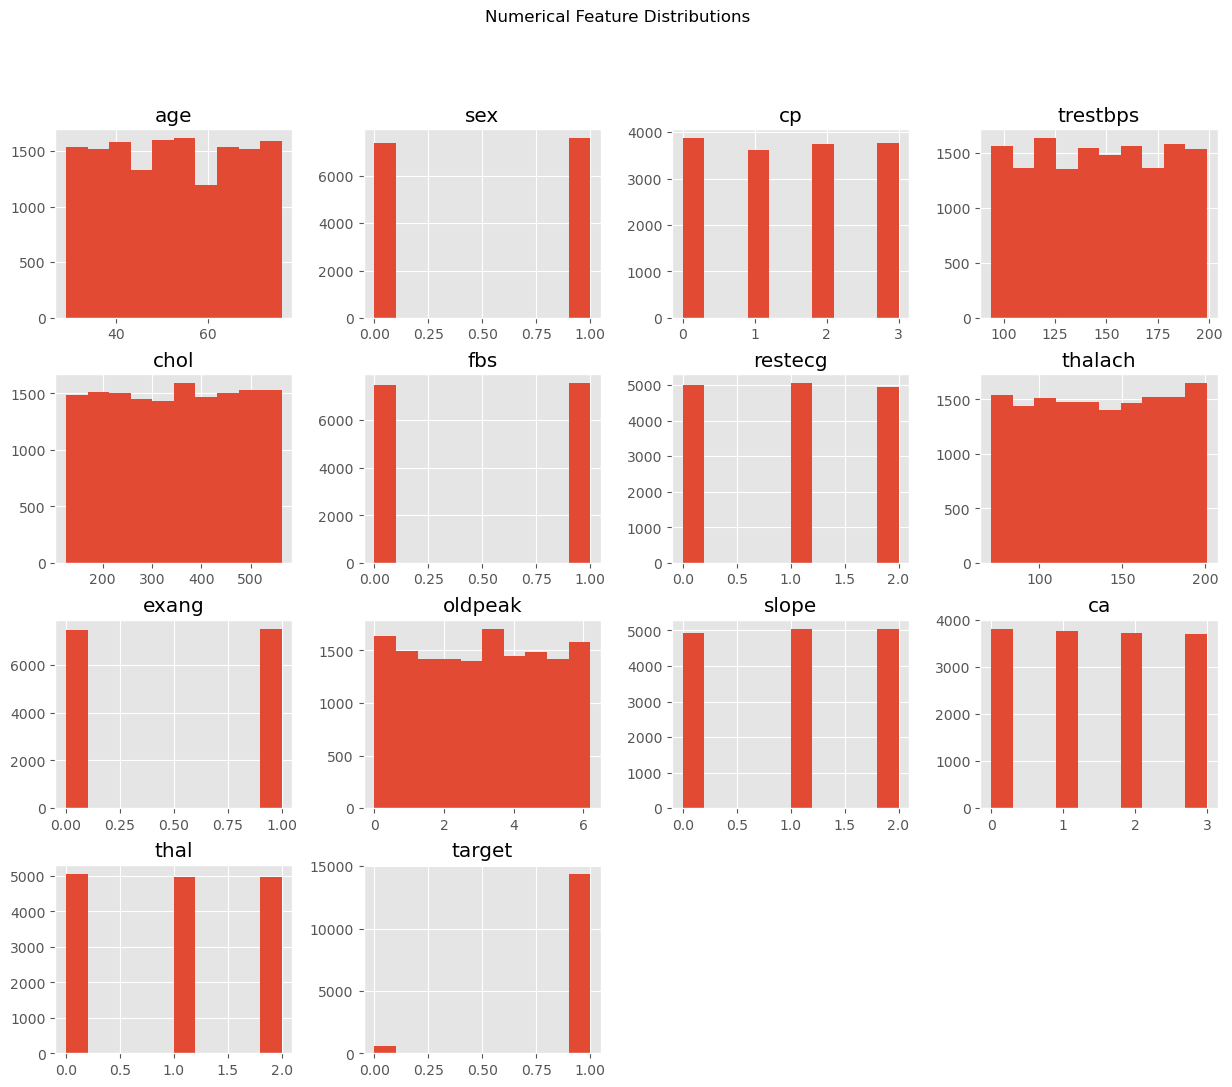

In [25]:
# ==========================
# 6. NUMERICAL FEATURE DISTRIBUTIONS
# ==========================

num_cols = df.select_dtypes(include=['int64','float64']).columns

df[num_cols].hist(figsize=(15, 12))
plt.suptitle("Numerical Feature Distributions")
plt.show()



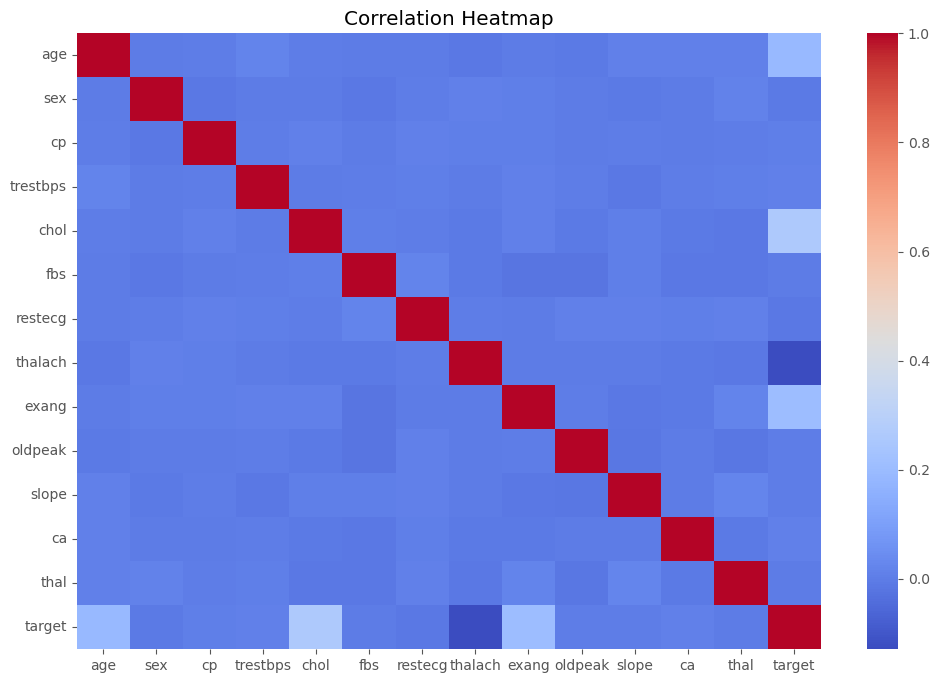

In [26]:
# ==========================
# 7. CORRELATION HEATMAP
# ==========================

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



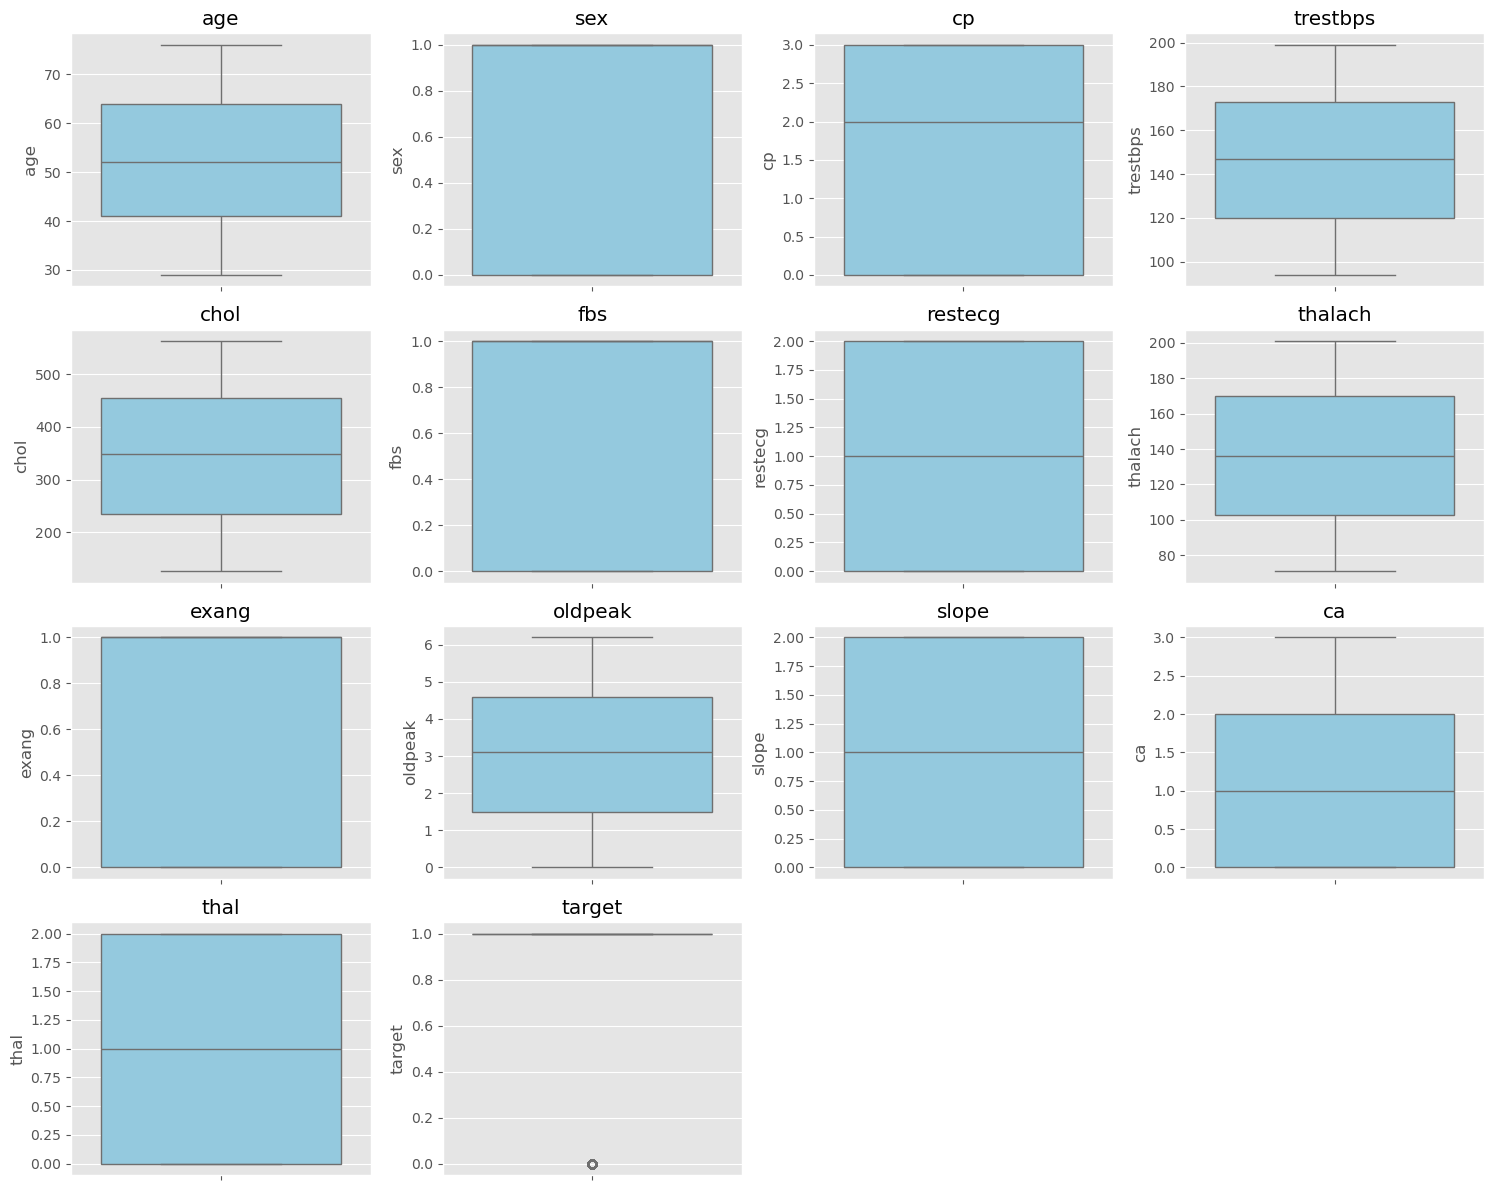

In [27]:
# ==========================
# 9. OUTLIER DETECTION (Boxplots)
# ==========================

plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()


In [28]:
# ==========================
# 10. SAVE CLEANED DATA TO ARTIFACTS
# ==========================

os.makedirs("../artifacts", exist_ok=True)
cleaned_path = "../artifacts/data.csv"

df.to_csv(cleaned_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_path}")



Cleaned dataset saved to: ../artifacts/data.csv
